In [1050]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1051]:
df = pd.read_csv('/content/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<Axes: xlabel='Sales', ylabel='Count'>

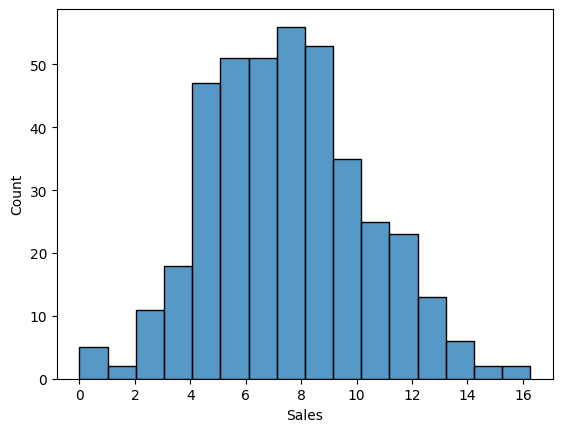

In [1052]:
sns.histplot(data=df, x='Sales')

In [1053]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [1054]:
max=df['Sales'].max()
min=df['Sales'].min()
mean=df['Sales'].mean()
print(max,min,mean)

16.27 0.0 7.496325000000001


In [1055]:
value=df['Sales']

In [1056]:
#converting Sales Contineous data into Sales categorial data

df['Ssales'] = pd.cut(x=df['Sales'], bins=[ 0,5,10,20],labels=['Bad_Sales','Ok_Sales','Good_Sales'])

In [1057]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Ok_Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good_Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good_Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Ok_Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad_Sales


In [1058]:
df['Ssales'].unique()

['Ok_Sales', 'Good_Sales', 'Bad_Sales', NaN]
Categories (3, object): ['Bad_Sales' < 'Ok_Sales' < 'Good_Sales']

In [1059]:
df.dropna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Ok_Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good_Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good_Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Ok_Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad_Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good_Sales
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Ok_Sales
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Ok_Sales
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Ok_Sales


<Axes: xlabel='Ssales', ylabel='count'>

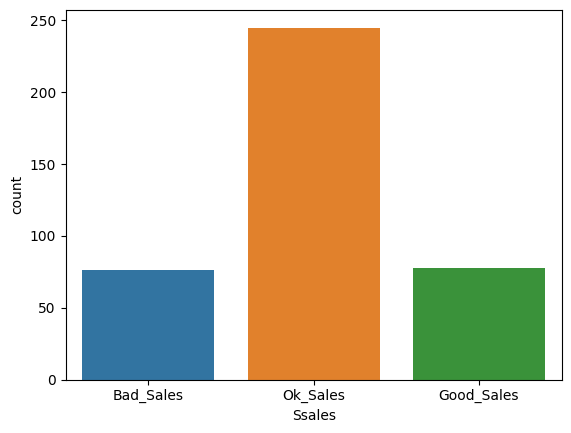

In [1060]:
sns.countplot(data=df, x='Ssales')

In [1061]:
df.drop('Sales', axis=1, inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Ok_Sales
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good_Sales
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good_Sales
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Ok_Sales
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad_Sales


In [1062]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1063]:
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['Urban']=le.fit_transform(df['Urban'])
df['US']=le.fit_transform(df['US'])
df['Ssales']=le.fit_transform(df['Ssales'])

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,0


In [1064]:
df['Ssales'].unique()

array([2, 1, 0, 3])

In [1065]:
#seperate dependent and independent fectures

x= df.iloc[:,:-1]
y= df.iloc[:,-1:]

In [1066]:
y

,Ssales
0,2
1,1
2,1
3,2
4,0
...,...
395,1
396,2
397,2
398,2


In [1067]:
#spilt into training and testing

from sklearn.model_selection import train_test_split

In [1068]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.40, random_state=20)

In [1069]:
#import DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [1070]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [1071]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [1072]:
ypred = model.predict(xtest)

In [1073]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        31
           1       1.00      0.13      0.23        31
           2       0.66      0.86      0.75        97
           3       0.00      0.00      0.00         1

    accuracy                           0.65       160
   macro avg       0.55      0.38      0.38       160
weighted avg       0.70      0.65      0.60       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1074]:
model.score(xtest,ytest)

0.65

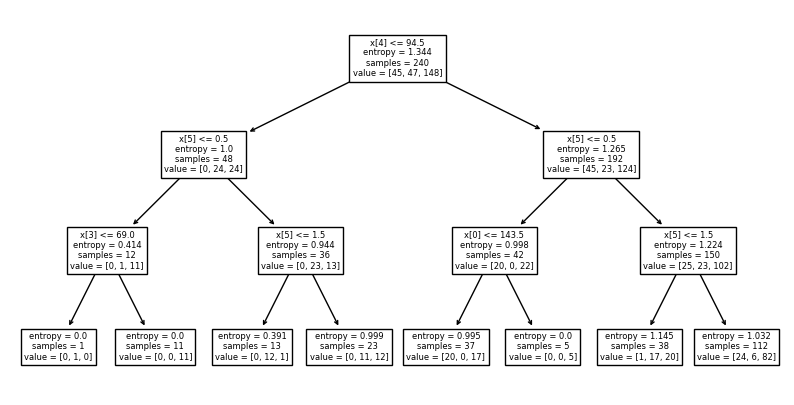

In [1075]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(model)
plt.show()

In [1076]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [1077]:
fn = x.columns
cn = ["Bad_Sales","Ok_Sales","Good_Sales"]

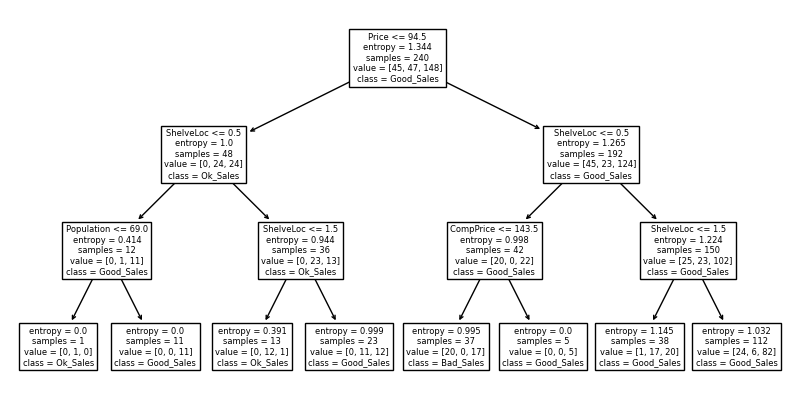

In [1078]:
plt.figure(figsize=(10,5))
tree.plot_tree(model, feature_names=fn, class_names=cn)
plt.show()

In [1100]:
model.feature_importances_


array([0.05183384, 0.        , 0.        , 0.05040144, 0.32112085,
       0.57664388, 0.        , 0.        , 0.        , 0.        ])

#Fraud Check

In [1079]:
fraud = pd.read_csv('/content/Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [1080]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Urban']=le.fit_transform(fraud['Urban'])


In [1097]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [1082]:
#seperate dependent and independent fectures

x1= fraud.iloc[:,:]
y1= fraud['Taxable.Income'].apply(lambda X: "Risky" if X <= 30000 else "Good")

# using lambda function to define condition

In [1083]:
y1

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [1084]:
#spilt into training and testing

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x1,y1, test_size=0.20, random_state=20)

In [1085]:
#import DecisionTree
from sklearn.tree import DecisionTreeClassifier

#assigning model
model1=DecisionTreeClassifier(criterion='entropy', max_depth=2)

#fit model on Training part
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [1086]:
y1pred = model1.predict(xtest)
y1pred

array(['Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good'

In [1087]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y1pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [1088]:
model1.score(xtest,y1pred)

1.0

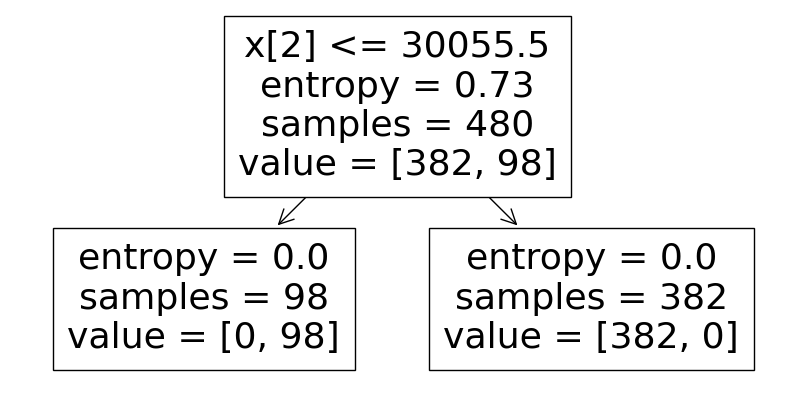

In [1089]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(model1)
plt.show()

In [1090]:
x1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [1093]:
fn1 = x1.columns
cn1 = ["Risky","Good"]

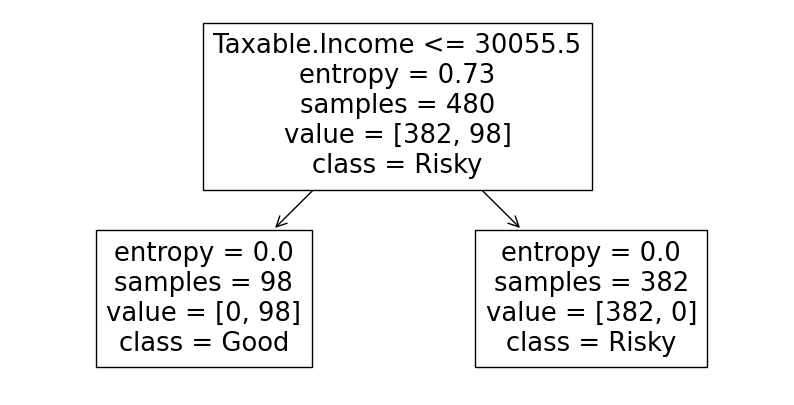

In [1094]:
plt.figure(figsize=(10,5))
tree.plot_tree(model1, feature_names=fn1, class_names=cn1)
plt.show()

In [1099]:
model1.feature_importances_

array([0., 0., 1., 0., 0., 0.])